# KNN

This type of algorithm is based on the 'k' closer data to predict a new one. Let's see how it works in the cancer dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import seaborn as sbn

%matplotlib inline

In [2]:
cancer_df = pd.read_csv('resources/breast-cancer-wisconsin.csv')
cancer_df = cancer_df.set_index('id')

In [3]:
cancer_df = cancer_df.drop('Unnamed: 32', axis=1)

In [4]:
target = cancer_df['diagnosis']
cancer_df = cancer_df.drop('diagnosis', axis=1)

B: 357
M: 212


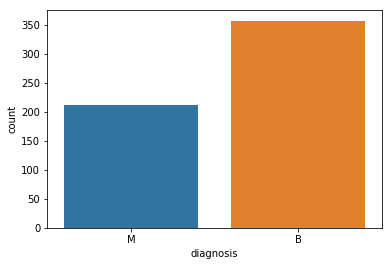

In [5]:
B, M = target.value_counts()
print('B: %i' %B)
print('M: %i' %M)
sbn.countplot(target, label='Count')

Usually we do not know anything about the variables, but how we can extract information about them

In [6]:
cancer_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


We can see in this set of statistical parameters than the max value for area_mean is 2501 and for symmetry_mean is 0.304 so, what does mean? Will be a good way to compare both features? Are there same units? These are a few interesting questions that we have to solve. So for compare, firstly I am going to standarize the data to a normal gaussian. 

In [7]:
ng_x = scale(cancer_df.values)
ng_df = pd.DataFrame(data=ng_x, index=cancer_df.index, columns=cancer_df.columns)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

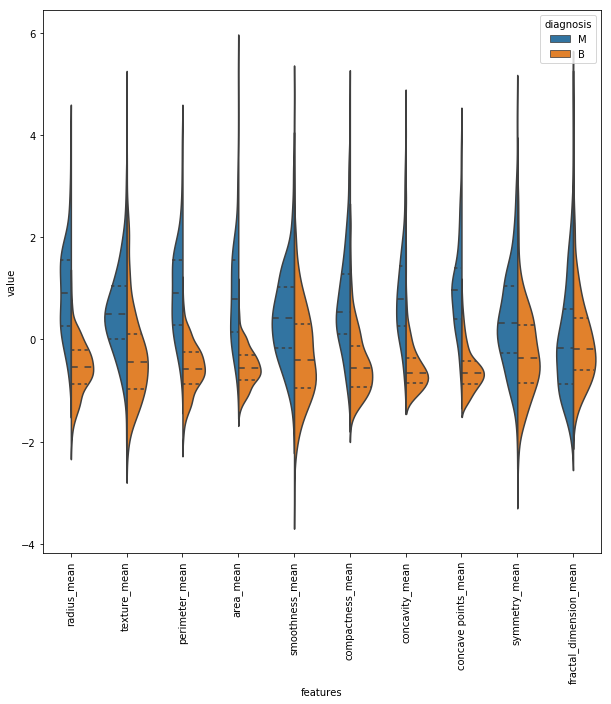

In [8]:
data = pd.concat([target.to_frame(), ng_df.iloc[:, 0:10]], axis=1)
data_bbdd = pd.melt(data, id_vars='diagnosis', var_name='features', value_name='value')
plt.figure(figsize=(10,10))
sbn.violinplot(x='features', y='value', hue='diagnosis', data=data_bbdd, split=True, inner='quart')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

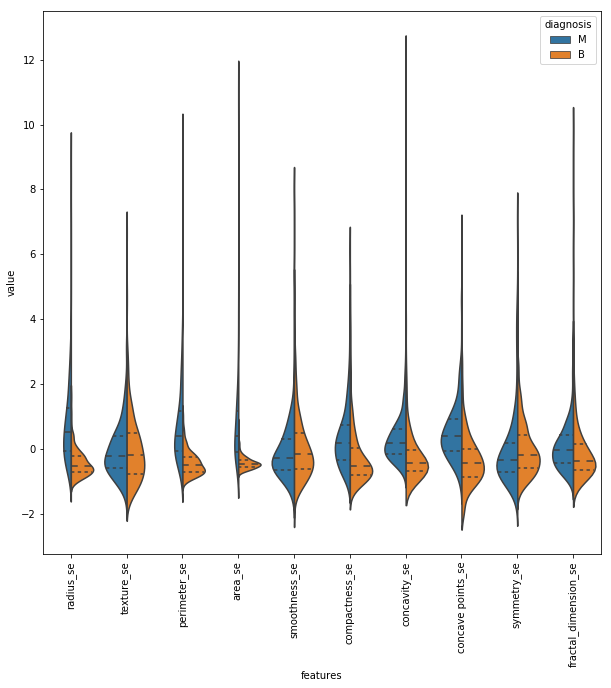

In [9]:
data = pd.concat([target.to_frame(), ng_df.iloc[:, 10:20]], axis=1)
data_bbdd = pd.melt(data, id_vars='diagnosis', var_name='features', value_name='value')
plt.figure(figsize=(10,10))
sbn.violinplot(x='features', y='value', hue='diagnosis', data=data_bbdd, split=True, inner='quart')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

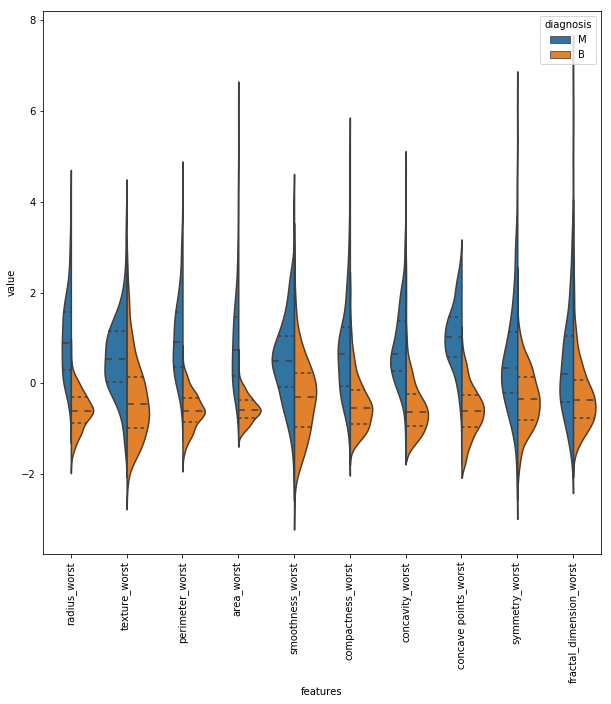

In [10]:
data = pd.concat([target.to_frame(), ng_df.iloc[:, 20:30]], axis=1)
data_bbdd = pd.melt(data, id_vars='diagnosis', var_name='features', value_name='value')
plt.figure(figsize=(10,10))
sbn.violinplot(x='features', y='value', hue='diagnosis', data=data_bbdd, split=True, inner='quart')
plt.xticks(rotation=90)

Of this visualization I can extract that when the mean of both categorical result are separated is probably to be that feature a good estimator

A common issue is when a dataset has repeated information because the featurres are correlated, let's see

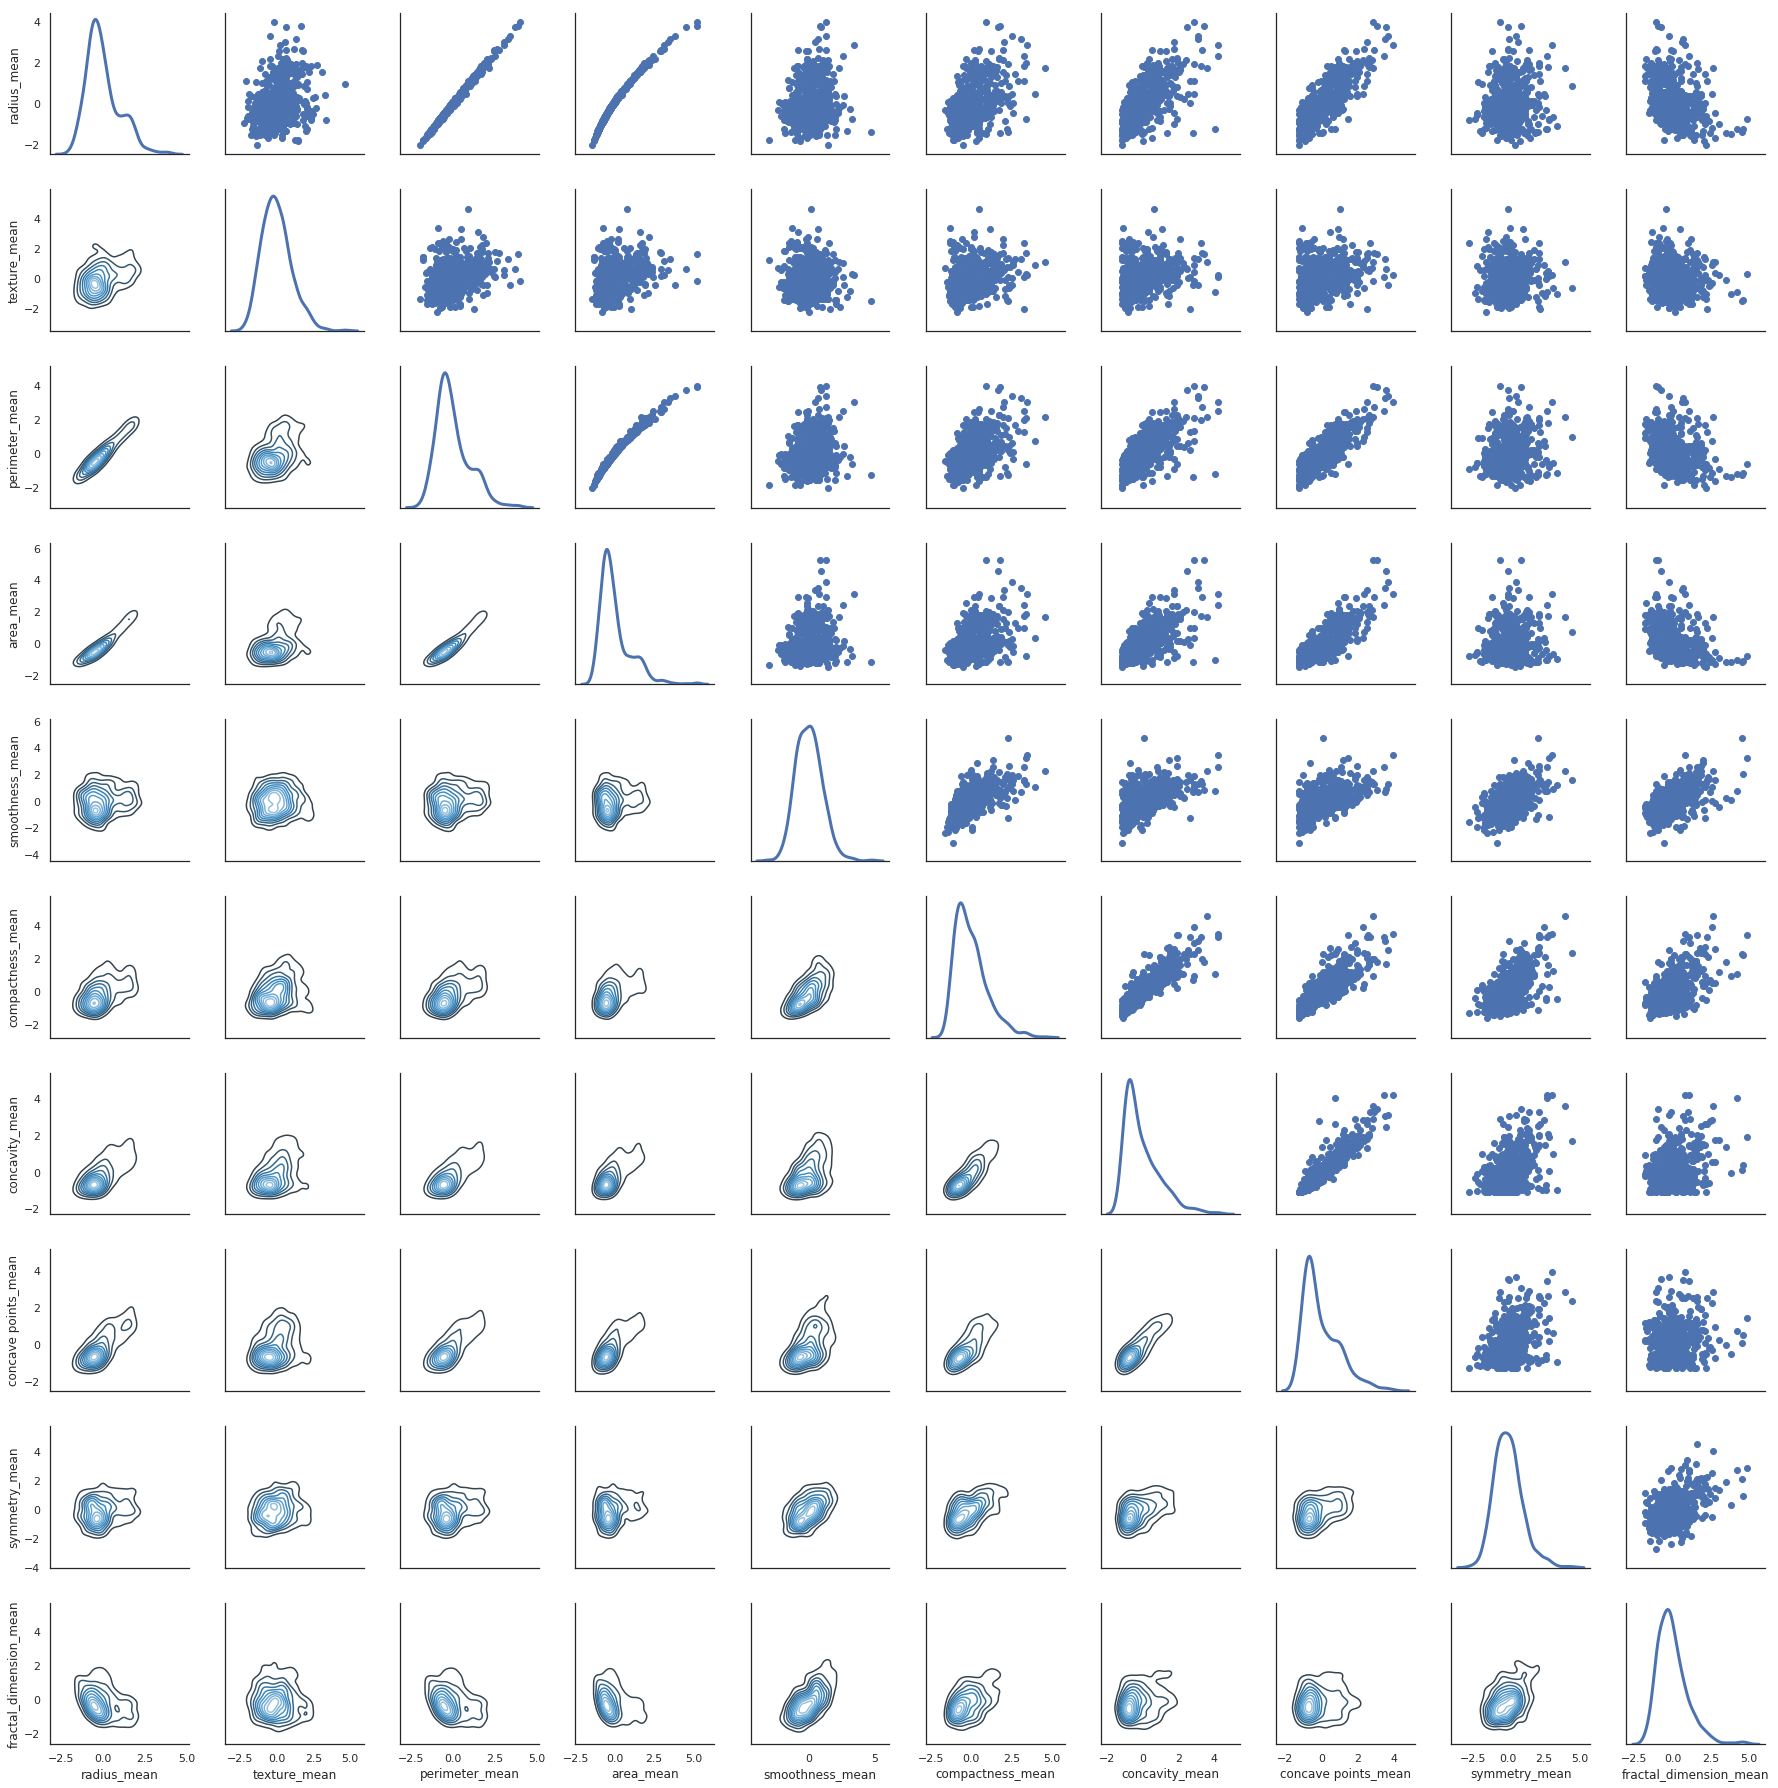

In [11]:
sbn.set(style='white')
graph = sbn.PairGrid(ng_df.iloc[:, 0:10], diag_sharey=False)
graph.map_lower(sbn.kdeplot, cmap='Blues_d')
graph.map_upper(plt.scatter)
graph.map_diag(sbn.kdeplot, lw=3)

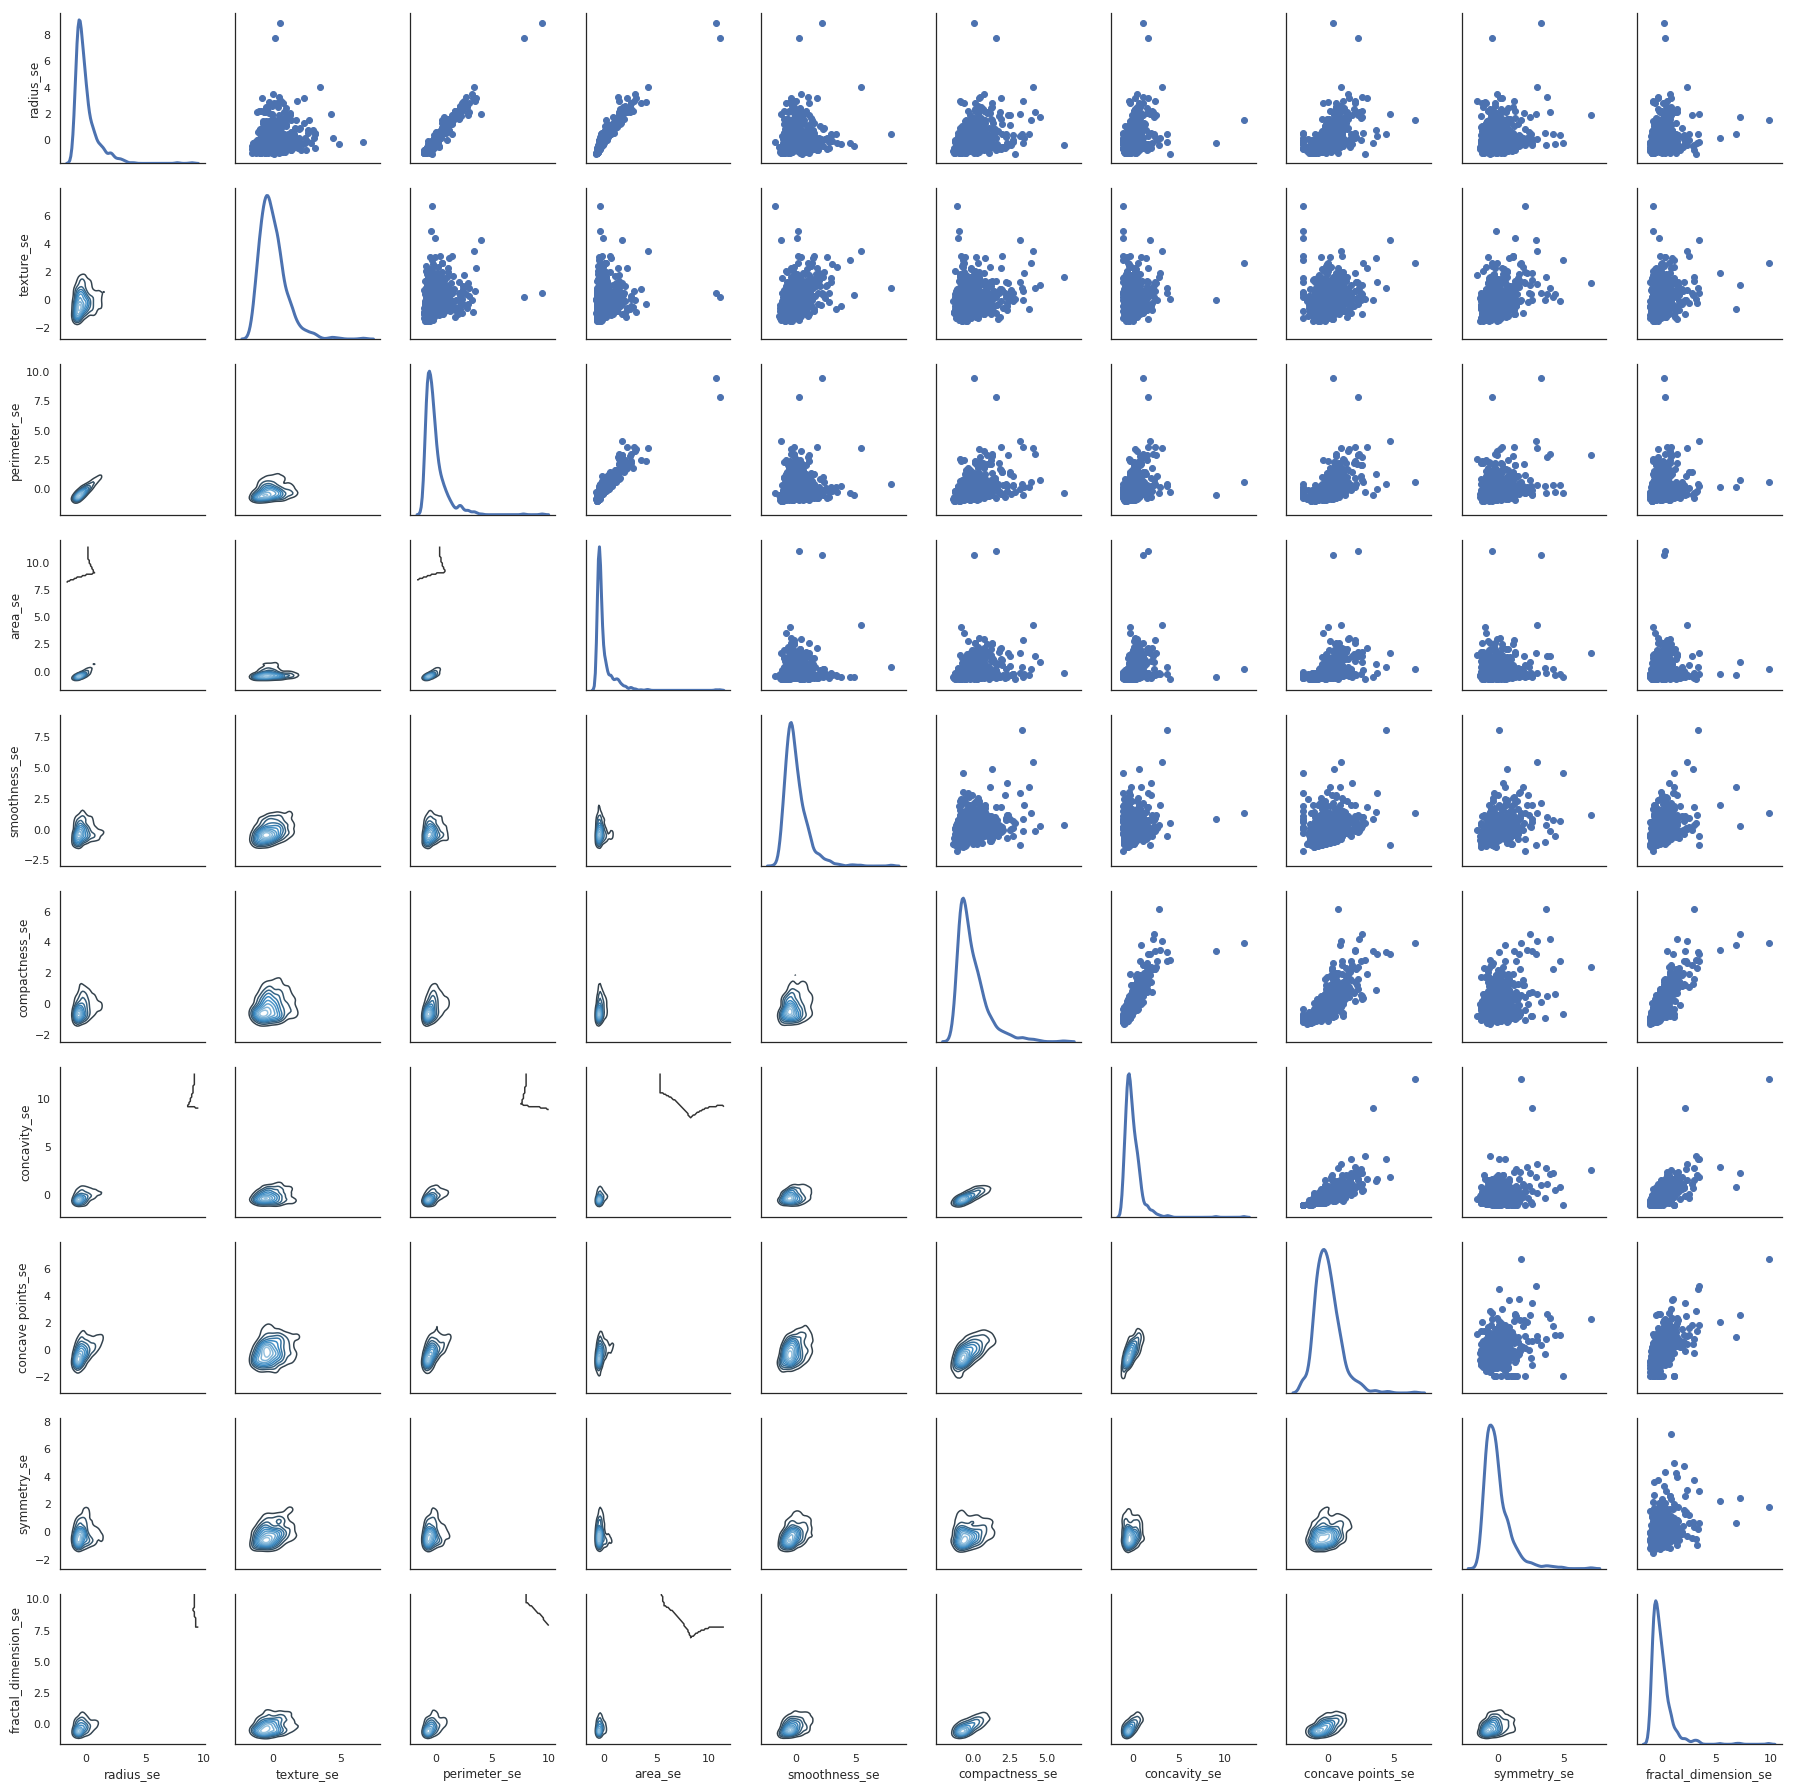

In [12]:
sbn.set(style='white')
graph = sbn.PairGrid(ng_df.iloc[:, 10:20], diag_sharey=False)
graph.map_lower(sbn.kdeplot, cmap='Blues_d')
graph.map_upper(plt.scatter)
graph.map_diag(sbn.kdeplot, lw=3)

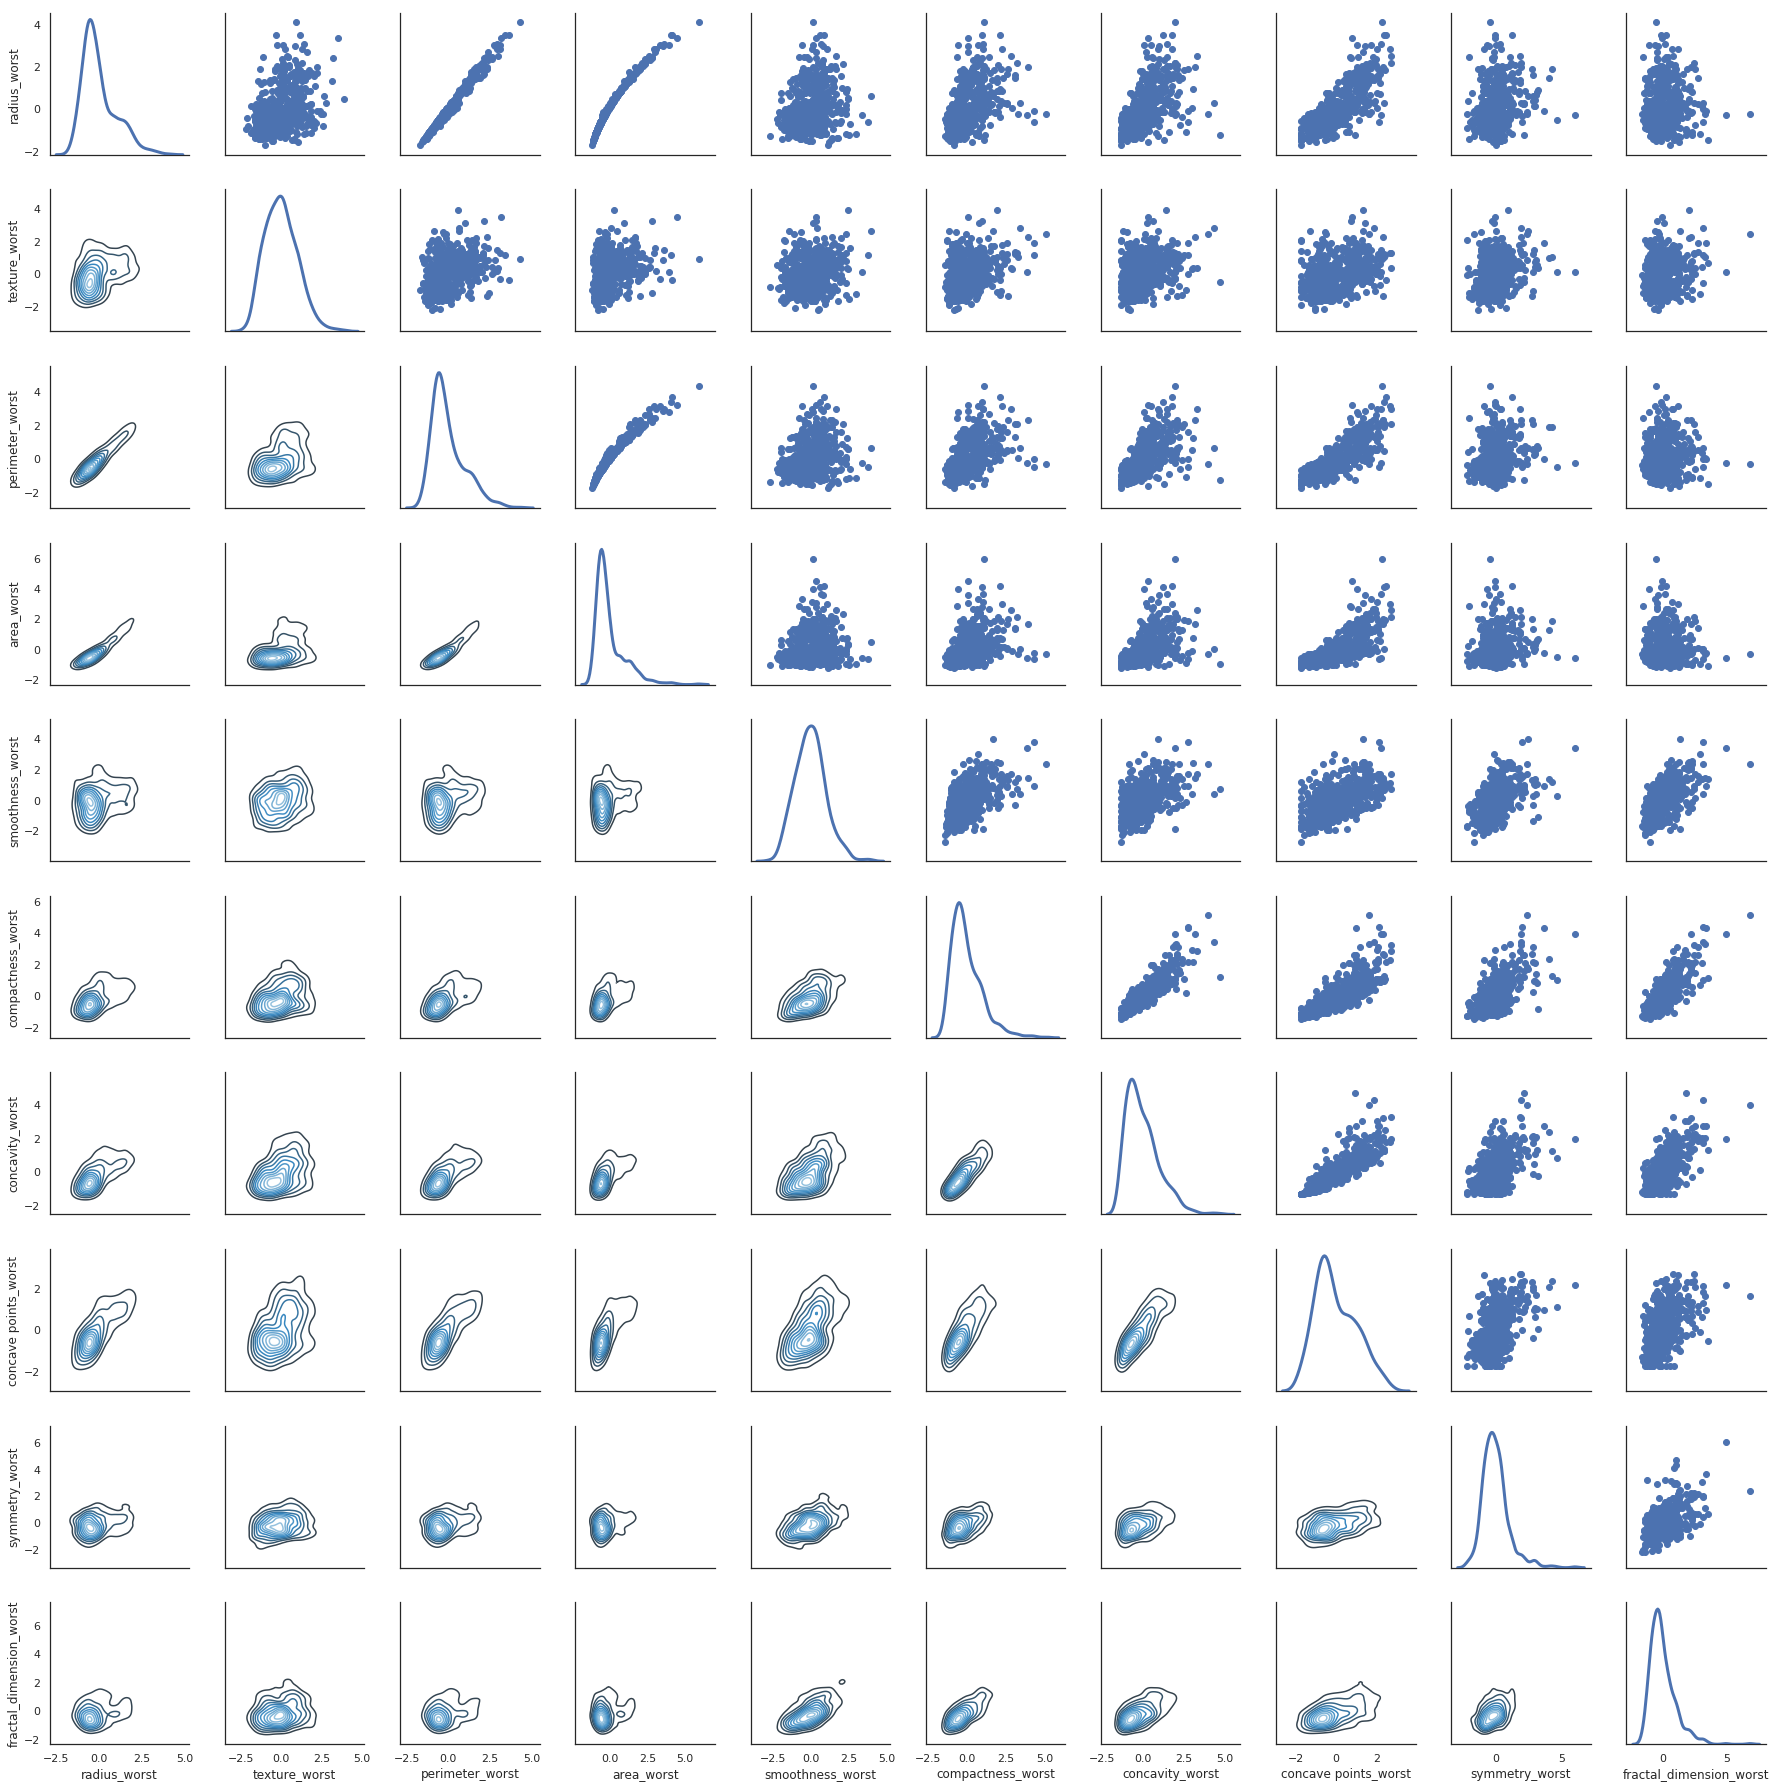

In [13]:
sbn.set(style='white')
graph = sbn.PairGrid(ng_df.iloc[:, 20:30], diag_sharey=False)
graph.map_lower(sbn.kdeplot, cmap='Blues_d')
graph.map_upper(plt.scatter)
graph.map_diag(sbn.kdeplot, lw=3)

Let's see a correlation map

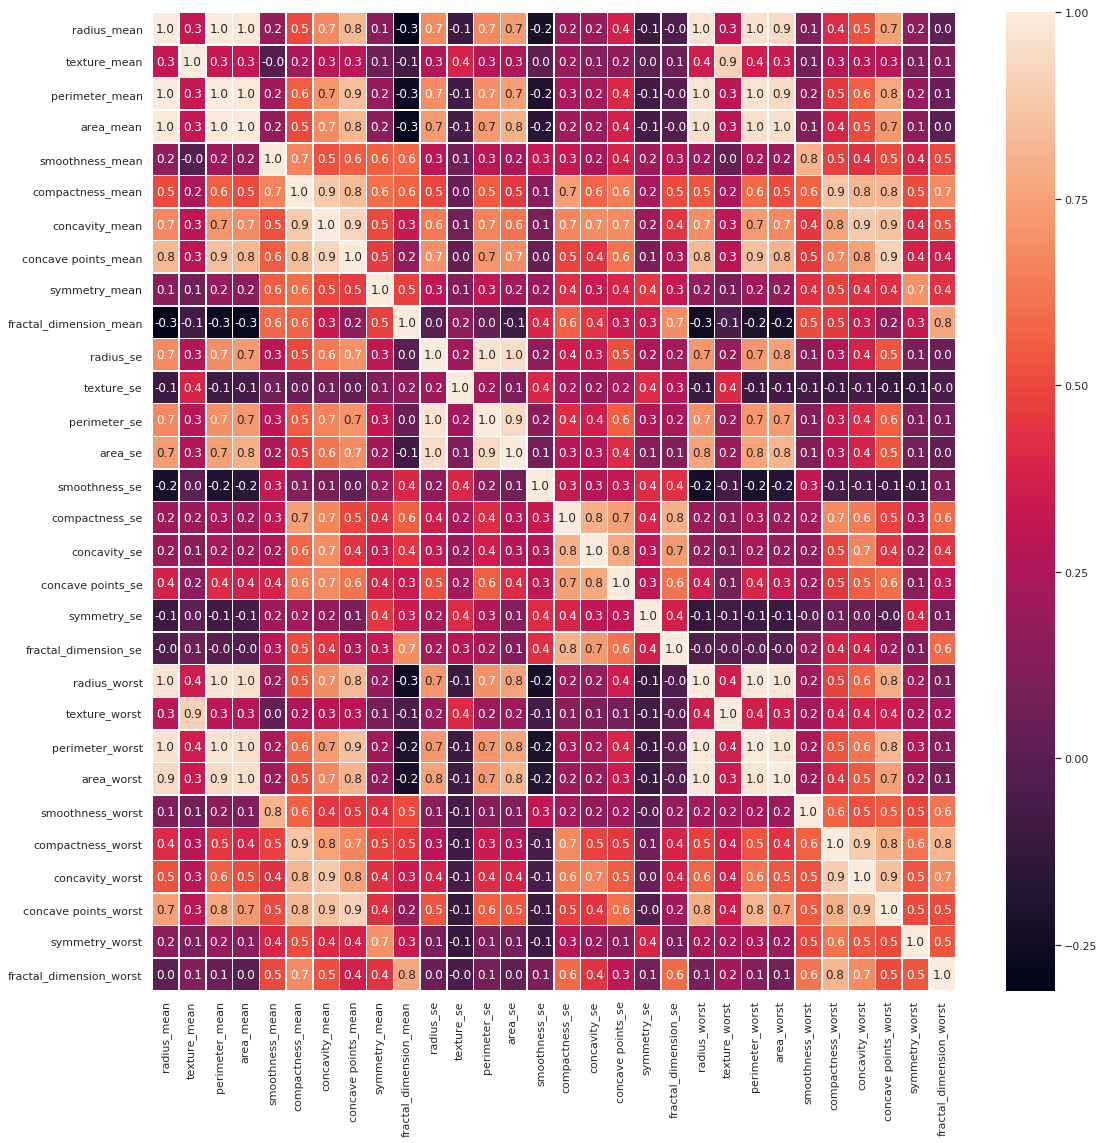

In [14]:
f, ax = plt.subplots(figsize=(18, 18))
sbn.heatmap(ng_df.corr(), annot=True, linewidth=0.5, fmt='.1f', ax=ax)

Now I am going o drop features that are more than 0.9 correlated

In [15]:
def imp_features(dataframe, limit_value):
    """
    Give the correlated features
    
    :param pd.DataFrame dataframe: dataframe with features to calc correlation
    :param float limit_value: aceptance of the correlation features
    return d: Dicitionary with the features where the key is the feature correlated with
    """
    
    dc = dataframe.corr()
    cols = dc.columns
    d = {}

    for feat in cols:
        lc = list(dc[(dc[feat] > limit_value)].index)
        lc.remove(feat)
        if not len(lc) == 0:
            print(feat, 'is correlated with', lc)
            d[feat] = lc
    return d
            
dct = imp_features(ng_df, 0.90)            

radius_mean is correlated with ['perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst']
texture_mean is correlated with ['texture_worst']
perimeter_mean is correlated with ['radius_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst']
area_mean is correlated with ['radius_mean', 'perimeter_mean', 'radius_worst', 'perimeter_worst', 'area_worst']
concavity_mean is correlated with ['concave points_mean']
concave points_mean is correlated with ['concavity_mean', 'concave points_worst']
radius_se is correlated with ['perimeter_se', 'area_se']
perimeter_se is correlated with ['radius_se', 'area_se']
area_se is correlated with ['radius_se', 'perimeter_se']
radius_worst is correlated with ['radius_mean', 'perimeter_mean', 'area_mean', 'perimeter_worst', 'area_worst']
texture_worst is correlated with ['texture_mean']
perimeter_worst is correlated with ['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'area_worst']
area_worst is correlated with

In [16]:
ng_df_red = ng_df.drop(dct['area_mean'], axis=1)
ng_df_red = ng_df_red.drop(dct['concave points_mean'], axis=1)
ng_df_red = ng_df_red.drop(dct['area_se'], axis=1)
ng_df_red = ng_df_red.drop(dct['texture_mean'], axis=1)
ng_df_red.shape

(569, 20)

In [17]:
x_tr, x_te, y_tr, y_te = train_test_split(ng_df_red, target.to_frame(), test_size=0.3, random_state=32)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_tr, y_tr)

/home/osboxes/anaconda3/envs/scikit/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [18]:
ac = metrics.accuracy_score(y_te, knn.predict(x_te))
print('Accuracy is %0.3f' %ac)

Accuracy is 0.947


In [19]:
print(metrics.classification_report(y_te, knn.predict(x_te), ['M', 'B']))

              precision    recall  f1-score   support

           M       0.95      0.91      0.93        66
           B       0.94      0.97      0.96       105

   micro avg       0.95      0.95      0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



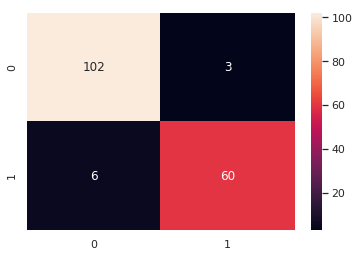

In [20]:
conf_mat = metrics.confusion_matrix(y_te, knn.predict(x_te))
sbn.heatmap(conf_mat, annot=True, fmt='d')

Let's try to do the model with selecting other features by other way based in top rated

In [21]:
x_tr, x_te, y_tr, y_te = train_test_split(cancer_df, target.to_frame(), test_size=0.3, random_state=32)
features = SelectKBest(chi2, k=5).fit(x_tr, y_tr)

In [22]:
for val, feat in zip(features.scores_, cancer_df.columns):
    print(feat + ':', val)

radius_mean: 197.03746476675835
texture_mean: 80.66149638239676
perimeter_mean: 1491.5622725943747
area_mean: 40089.20023205459
smoothness_mean: 0.1101047367973679
compactness_mean: 4.08752220593038
concavity_mean: 14.364000527692426
concave points_mean: 7.630060408493202
symmetry_mean: 0.17182579303331047
fractal_dimension_mean: 1.4717951031436684e-05
radius_se: 27.708688997060026
texture_se: 0.3208129270521823
perimeter_se: 197.29616685127607
area_se: 6586.187937045197
smoothness_se: 0.00032726181915803537
compactness_se: 0.5421176305949561
concavity_se: 0.7876425712699047
concave points_se: 0.21471256024055607
symmetry_se: 0.001326288668809193
fractal_dimension_se: 0.010773885424490169
radius_worst: 353.21894787748494
texture_worst: 138.5967947330224
perimeter_worst: 2640.372619419895
area_worst: 80935.19047307607
smoothness_worst: 0.24685156271693598
compactness_worst: 13.424979289709697
concavity_worst: 26.922623655829337
concave points_worst: 9.007986879316421
symmetry_worst: 0.7

In [23]:
x_tr2 = features.transform(x_tr)
x_te2 = features.transform(x_te)

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_tr2, y_tr)

/home/osboxes/anaconda3/envs/scikit/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [25]:
ac = metrics.accuracy_score(y_te, knn.predict(x_te2))
print('Accuracy is %0.3f' %ac)

Accuracy is 0.906


In [26]:
print(metrics.classification_report(y_te, knn.predict(x_te2), ['M', 'B']))

              precision    recall  f1-score   support

           M       0.90      0.85      0.88        66
           B       0.91      0.94      0.93       105

   micro avg       0.91      0.91      0.91       171
   macro avg       0.91      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



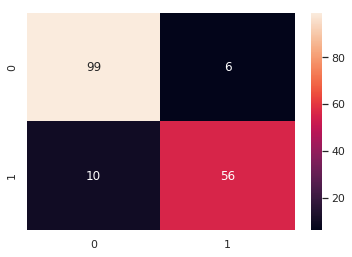

In [27]:
conf_mat = metrics.confusion_matrix(y_te, knn.predict(x_te2))
sbn.heatmap(conf_mat, annot=True, fmt='d')